In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [11]:
diabetes_data = load_breast_cancer()

X = diabetes_data.data
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

# Accuracy

In [12]:
from sklearn.metrics import accuracy_score

print(f'El accuracy del modelo es: {accuracy_score(y_test, predictions)}')

El accuracy del modelo es: 0.9473684210526315


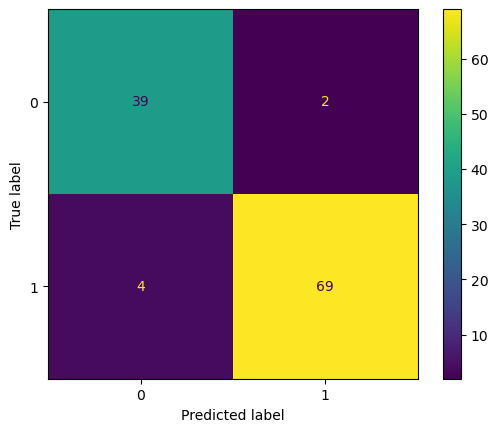

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
(39+69)/(39+69+4+2)

0.9473684210526315

# PRECISION

In [27]:
from sklearn.metrics import precision_score

print(f'El Precision del modelo es: {precision_score(y_test, predictions)}')

El Precision del modelo es: 0.971830985915493


In [28]:
69/(69+2)

0.971830985915493

# RECALL

In [29]:
from sklearn.metrics import recall_score

print(f'El Recall del modelo es: {recall_score(y_test, predictions)}')

El Recall del modelo es: 0.9452054794520548


In [30]:
69/(69+4)

0.9452054794520548

AUC for our classifier is: 0.9769462078182426


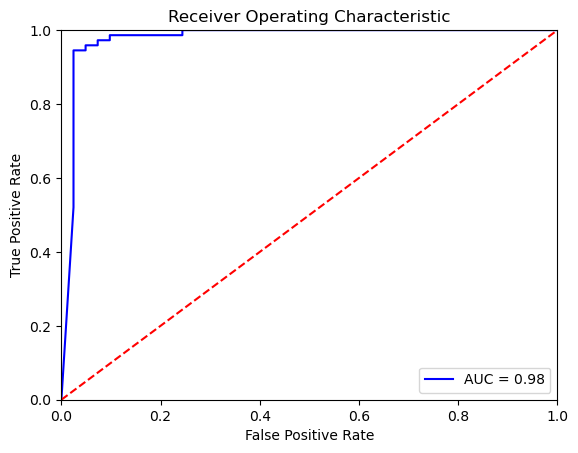

In [31]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
from sklearn.metrics import f1_score


print(f'El f1_score del modelo es: {f1_score(y_test, predictions)}')

El f1_score del modelo es: 0.9583333333333334


In [33]:
print(f'El Precision del modelo es: {precision_score(y_test, predictions)}')
print(f'El Recall del modelo es: {recall_score(y_test, predictions)}')
print(f'El f1_score del modelo es: {f1_score(y_test, predictions)}')

El Precision del modelo es: 0.971830985915493
El Recall del modelo es: 0.9452054794520548
El f1_score del modelo es: 0.9583333333333334


In [34]:
#F1 = 2 * (precision * recall) / (precision + recall)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("Titanic.csv", sep = ",")

In [38]:
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42)

arbol_de_decision.fit(X_train,y_train) 

y_test_pred = arbol_de_decision.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.786046511627907


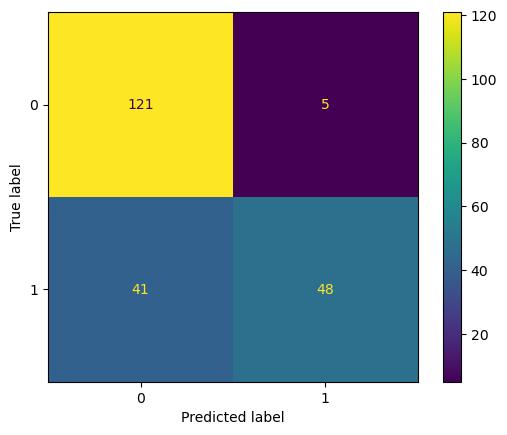

In [39]:
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
print(f"Precision Score of the classifier is: {precision_score(y_test, y_test_pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, y_test_pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, y_test_pred)}")

Precision Score of the classifier is: 0.9056603773584906
Recall Score of the classifier is: 0.5393258426966292
F1 Score of the classifier is: 0.676056338028169


In [43]:
121/(121+41)

0.7469135802469136

In [ ]:
# al modelo le cuesta mucho identificar cuando es 1 pero cuando lo hace le pega al 90%

AUC for our classifier is: 0.792402354200107


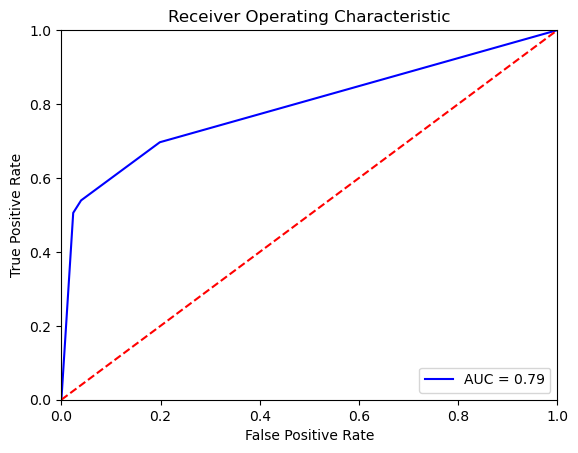

In [42]:
from sklearn.metrics import roc_curve, auc

class_probabilities = arbol_de_decision.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()